In [1]:
import os
import yaml
import pandas as pd
import sqlalchemy

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display 
pd.options.display.max_columns = None
%matplotlib inline

def connect(poolclass=sqlalchemy.pool.QueuePool):
    with open(os.path.join(os.path.join('../..','config'), 'joco_db_profile.yaml')) as fd:
        config = yaml.load(fd)
        dburl = sqlalchemy.engine.url.URL(
            "postgres",
            host=config["host"],
            username=config["user"],
            database=config["db"],
            password=config["pass"],
            port=config["port"],
        )
        return sqlalchemy.create_engine(dburl, poolclass=poolclass)

    
def connect2(poolclass=sqlalchemy.pool.QueuePool):
    with open(os.path.join(os.path.join('../..', 'config'), 'joco_db_profile_old.yaml')) as fd:
        config = yaml.load(fd)
        dburl = sqlalchemy.engine.url.URL(
                "postgres",
                host = config["host"],
                username = config["user"],
                database = config["db"],
                password = config["pass"],
                port = config["port"])
        return sqlalchemy.create_engine(dburl, poolclass=poolclass)
    
    
conn = connect()
conn2 = connect2()

import RecallAdjuster as ra
from importlib import reload
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app
/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:29: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [2]:
import datetime
from dateutil.relativedelta import relativedelta
base = datetime.datetime.strptime('2018-04-01', '%Y-%m-%d')
date_pairs = []
for x in range(9,-1,-1):
    date_pairs.append(
        (
        (base - relativedelta(months=4*x) - relativedelta(years=1)).strftime('%Y-%m-%d'),
        (base - relativedelta(months=4*x) - relativedelta(years=1)).strftime('%Y-%m-%d')
        )
    )
    date_pairs.append(
        (
        (base - relativedelta(months=4*x) - relativedelta(years=1)).strftime('%Y-%m-%d'),
        (base - relativedelta(months=4*x)).strftime('%Y-%m-%d')
        )
    )

import seaborn as sns
print(date_pairs)

[('2014-04-01', '2014-04-01'), ('2014-04-01', '2015-04-01'), ('2014-08-01', '2014-08-01'), ('2014-08-01', '2015-08-01'), ('2014-12-01', '2014-12-01'), ('2014-12-01', '2015-12-01'), ('2015-04-01', '2015-04-01'), ('2015-04-01', '2016-04-01'), ('2015-08-01', '2015-08-01'), ('2015-08-01', '2016-08-01'), ('2015-12-01', '2015-12-01'), ('2015-12-01', '2016-12-01'), ('2016-04-01', '2016-04-01'), ('2016-04-01', '2017-04-01'), ('2016-08-01', '2016-08-01'), ('2016-08-01', '2017-08-01'), ('2016-12-01', '2016-12-01'), ('2016-12-01', '2017-12-01'), ('2017-04-01', '2017-04-01'), ('2017-04-01', '2018-04-01')]


## [Plotting variants]

In [3]:
import SAVE_RecallAdjuster as sra
from jinja2 import Template
import time

#### Original

In [158]:
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_original',
        experiment_hashes='922b589d2ddd187665524dab017228c9', #This might have changed.
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=581.8155620098114


### No Protected

In [4]:
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_nop',
        experiment_hashes='b69f9578743dd2bfcb6faee7b06b0b92',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=639.5894668102264


### Under-1-Orig-Orig

In [163]:
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_under_1_orig_orig',
        experiment_hashes='5fc43b64d58ae8dc6c3e35e96c684516',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=568.4406595230103


### Not Running - v1b_u, v1c_u -- as they are SAME to original.
### Not Running - v2b_u -- as this is IDENTICAL to original.

In [164]:
'''
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_under_2_orig_orig',
        experiment_hashes='dd7532aee10b20dc47ddcef9a1a8501a',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))
'''

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=564.7839813232422


In [165]:
'''
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_under_3_orig_orig',
        experiment_hashes='4db48c88327d7fdc8d3f84de3d3b6569',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))
'''

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=571.1976265907288


In [175]:
'''
THIS NEES TO BE RUN - BUT DONT RUN NOW - Since we want to save on time 
'''
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_under_orig_50_50',
        experiment_hashes='56c9b82dfd54e893b368859dea4a4c96',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=567.1933300495148


In [4]:
'''
THIS NEES TO BE RUN - BUT DONT RUN NOW - Since we want to save on time 
'''
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_under_orig_50_orig',
        experiment_hashes='c7594f5e9e62b1359076bf924576c436',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=607.762996673584


In [5]:
# We need to re-run this.
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_under_1_50_50',
        experiment_hashes='1d118bd0eb09b3d24af029e4f74d658f',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=598.4236323833466


In [191]:
'''
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_under_orig_same_nop_orig',
        experiment_hashes='46f9ead47c63aed1c5f1c1f1125114b9',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))
'''

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=592.6669101715088


In [195]:
'''
THIS DOESNT NEED TO BE RE-RUN. Our metric was good for this. 
But in overall flow do run
'''
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_under_1_same_nop_orig',
        experiment_hashes='5fa9d4f74a52ed283230e979b6681aa9',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=584.8443627357483


In [197]:

start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_over_1_orig_orig',
        experiment_hashes='91538d7862f73018583ea200c8b5332d',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=591.6869721412659


In [200]:
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_over_2_orig_orig',
        experiment_hashes='e6dafc1f03f9700051777afe66e93c82',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=588.822432756424


In [201]:
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_over_3_orig_orig',
        experiment_hashes='29b02b35feeaab7bed3040bcb68d8617',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=591.9462697505951


In [204]:
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_over_orig_50_50',
        experiment_hashes='6c9bb810a1cb616d64c8167dbd29dc2d',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=591.2591869831085


In [206]:
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_over_orig_50_orig',
        experiment_hashes='2e2341b8835b2cd56f0c6f3d387bb6bd',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=588.9216492176056


In [209]:
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_over_orig_same_nop_orig',
        experiment_hashes='2481f97a89309085c631471df464325d',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=588.6265432834625


In [6]:
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_over_1_50_50',
        experiment_hashes='8377989ce078dfafdde137ecb3910478',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=598.7422893047333


In [211]:
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_over_1_same_nop_orig',
        experiment_hashes='a19f07e054456b208ac6b98e1e2f9dc7',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=596.1266095638275


### Running adjustments for composite

In [16]:
conn.dispose()
conn = connect()
reload(sra)

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


<module 'SAVE_RecallAdjuster' from '/mnt/data/users/hemank/peeps-chili/code_2/inmate_mental_health/SAVE_RecallAdjuster.py'>

In [17]:
myRA_decoupled = sra.RecallAdjuster(
        engine=conn,
        pg_role='rg_staff',
        schema='hemank_bias_decoupled',
        experiment_hashes='922b589d2ddd187665524dab017228c9',
        date_pairs=date_pairs,
        list_sizes=[500],
        #entity_demos='joco',
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        demo_col='race_2way',
        decoupled_experiments=[
            ('7919a4a22d4ed46d199e9387b99bcffd', 'White'), 
            ('48776f644a102217c57e2ca6724c614b', 'NonWhite')],
        decoupled_entity_demos='hemank_bias_alternatives.currmatch_entity_demos'
)

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment


In [25]:
sql_decoupled = Template("""
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM {{schema}}.model_adjustment_results_race_2way
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)


-- -- Composite model (with decoupled models)
SELECT 'Composite w/ Decoupled - Adjusted'::VARCHAR(128) AS strategy,
      train_end_time, past_train_end_time,
      list_size, metric, parameter,
      value,
      max_recall_ratio,
      recall_white_to_nonwhite AS recall_w_to_nw,
      recall_nonwhite_to_white AS recall_nw_to_w
FROM {{schema}}.composite_results_decoupled_race_2way
WHERE train_end_time > past_train_end_time
;
""")

In [26]:
params = {}
params['schema'] = 'hemank_bias_decoupled'
sql_decoupled = sql_decoupled.render(**params)
ts_df_decoupled = pd.read_sql(sql_decoupled, conn)

### Running adjustments for Zafar

In [ ]:
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='joco_bias_zafar',
        experiment_hashes='',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

## Original

In [198]:
query = """
select id, experiment_hash, experiment_kwargs->>'project_path' AS pp, matrices_skipped, models_made
from model_metadata.experiment_runs 
where models_made=689
order by id
"""
df = pd.read_sql(query, conn)
df

,id,experiment_hash,pp,matrices_skipped,models_made
0,3,b69f9578743dd2bfcb6faee7b06b0b92,/mnt/data/experiment_data/joco/joco_nop,0,689
1,5,922b589d2ddd187665524dab017228c9,/mnt/data/experiment_data/joco/joco_original,0,689
2,7,5fc43b64d58ae8dc6c3e35e96c684516,/mnt/data/experiment_data/joco/under_1_origina...,26,689
3,8,dd7532aee10b20dc47ddcef9a1a8501a,/mnt/data/experiment_data/joco/under_2_origina...,26,689
4,10,4db48c88327d7fdc8d3f84de3d3b6569,/mnt/data/experiment_data/joco/under_3_origina...,26,689
5,11,56c9b82dfd54e893b368859dea4a4c96,/mnt/data/experiment_data/joco/under_original_...,26,689
6,13,3973aaaf8649e21418d50ec58139ecf7,/mnt/data/experiment_data/joco/under_original_...,26,689
7,14,46f9ead47c63aed1c5f1c1f1125114b9,/mnt/data/experiment_data/joco/under_original_...,26,689
8,18,04a0061bd712b972157aa72ca49b09d9,/mnt/data/experiment_data/joco/under_1_50_50,26,689
9,19,87f7dd2c69d095ad1ef7c1302002498b,/mnt/data/experiment_data/joco/over_1_50_50,26,689


In [207]:
df[df['id']==30]['pp'].values[0]

'/mnt/data/experiment_data/joco/over_original_same_nop_original'

In [187]:
query = """
select id, experiment_hash, experiment_kwargs->>'project_path' AS pp, 
matrices_skipped, models_made
from model_metadata.experiment_runs 
order by id
"""
df = pd.read_sql(query, conn)
df['pp'].values

array(['/mnt/data/experiment_data/joco/joco_original',
       '/mnt/data/experiment_data/joco/joco_nop',
       '/mnt/data/experiment_data/joco/joco_nop',
       '/mnt/data/experiment_data/joco/joco_original',
       '/mnt/data/experiment_data/joco/joco_original',
       '/mnt/data/experiment_data/joco/under_1_original_original',
       '/mnt/data/experiment_data/joco/under_1_original_original',
       '/mnt/data/experiment_data/joco/under_2_original_original',
       '/mnt/data/experiment_data/joco/under_3_original_original',
       '/mnt/data/experiment_data/joco/under_3_original_original',
       '/mnt/data/experiment_data/joco/under_original_50_50',
       '/mnt/data/experiment_data/joco/under_original_50_original',
       '/mnt/data/experiment_data/joco/under_original_50_original',
       '/mnt/data/experiment_data/joco/under_original_same_nop_original',
       '/mnt/data/experiment_data/joco/under_1_50_50',
       '/mnt/data/experiment_data/joco/under_1_50_50',
       '/mnt/data/

In [5]:
start_time = time.time()
myRA_original = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_FEXP_orig',
        experiment_hashes='53918b13ea1115d6b5d2b5b16ef4e2f4',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=868.8650126457214


In [47]:
start_time = time.time()
myRA_nop = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_FEXP_no_prot',
        experiment_hashes='a0627b7080228d23a7741c9c1d85b193',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=609.7837510108948


In [8]:
import time
start_time = time.time()
myRA_us = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_FEXP_us',
        experiment_hashes='e10d57598dc45dc7892def885ee80f5e',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=377.4579384326935


In [9]:
start_time = time.time()
myRA_us_frac = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_FEXP_us_frac',
        experiment_hashes='ce8d7c392639b830de06f7c2373df66a',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=376.85623264312744


In [11]:
start_time = time.time()
myRA_os = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_FEXP_os',
        experiment_hashes='70ad43a408eff366c4bfd4709a9e9f6c',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=373.2718005180359


In [12]:
myRA_os_frac = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_FEXP_os_frac',
        experiment_hashes='49bb752f08b2bd8401ac979b852f5b53',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=1281.8405487537384


In [54]:
start_time = time.time()
myRA_us_2 = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_FEXP_us_2',
        experiment_hashes='dbbdc91c3b2f6972facadfe548173368',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=371.95214462280273


In [55]:
start_time = time.time()
myRA_us_frac_2 = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_FEXP_us_frac_2',
        experiment_hashes='0e64c815ca4da61b84b1256a7c489cd0',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=376.7968821525574


In [61]:
start_time = time.time()
myRA_us_3 = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_FEXP_us_3',
        experiment_hashes='ec679bbe82b143b2baeff6250fdb214f',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=373.5862202644348


In [57]:
start_time = time.time()
myRA_us_frac_3 = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_FEXP_us_frac_3',
        experiment_hashes='ec780b89e18bc3864945abb02ed38ca2',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=338.3564043045044


In [48]:
start_time = time.time()
myRA_both_under = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_FEXP_both_sampling_under',
        experiment_hashes='913a60029ca830756558d29f6d4622b8',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=593.0253474712372


In [150]:
start_time = time.time()
myRA_both_over = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_FEXP_both_sampling_over',
        experiment_hashes='7659036a9799d4e6f96a1d5392f51d2c',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.currmatch_entity_demos',
        demo_col='race_2way'
)
print("Time Taken="+str(time.time()-start_time))

Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=591.2981553077698


## Adding - Zafar Classification Method

## Zafar method run in zafar_methods/zafar_post.ipynb

AttributeError: 'str' object has no attribute 'render'

In [68]:
experiment_hash='53918b13ea1115d6b5d2b5b16ef4e2f4'
model_group_id = 55
query = """
    with rel_models as
    (
        select model_id, model_hash 
        from model_metadata.models
        where 
            built_by_experiment = '%s'
            and model_group_id = %s
    ),
    train_matrices as
    (
        select model_id, matrix_uuid from
        train_results.prediction_metadata
    ),
    test_matrices as 
    (
        select model_id, matrix_uuid from 
        test_results.prediction_metadata
    ),
    matrix_info as 
    (
        select matrix_id, matrix_uuid,
        matrix_type, num_observations
        from model_metadata.matrices
    )
    select 
        rel_models.model_id, 
        train_matrices.matrix_uuid as train_matrix_id,
        test_matrices.matrix_uuid as test_matrix_id,
        m1.matrix_id as train_id, 
        m1.num_observations as train_n_obs,
        m2.matrix_id as test_id,
        m2.num_observations as test_n_obs
    from 
        rel_models, 
        train_matrices, test_matrices,
        matrix_info m1, matrix_info m2
    where
        rel_models.model_id = train_matrices.model_id 
    and
        rel_models.model_id = test_matrices.model_id
    and 
        m1.matrix_uuid = train_matrices.matrix_uuid
    and 
        m2.matrix_uuid = test_matrices.matrix_uuid;
    """%(str(experiment_hash), str(model_group_id))

df=pd.read_sql(query, conn)

In [69]:
vals = df.values
train_test_matrices = []

for v in vals:
    train_test_matrices.append([(v[1], v[2])])

In [73]:
import json
for i in range(len(train_test_matrices)):
    test_matrix=train_test_matrices[i][0][1]
    path = os.path.join(zafar_dir, "INFO_"+test_matrix)
    if(os.path.exists(path)):
        res = json.load(open(path, 'r'))
        print(res['recall_white'], res['recall_nonwhite'])
        


0.045152091254752835 0.028593508500772802
0.05470249520153547 0.02395672333848531


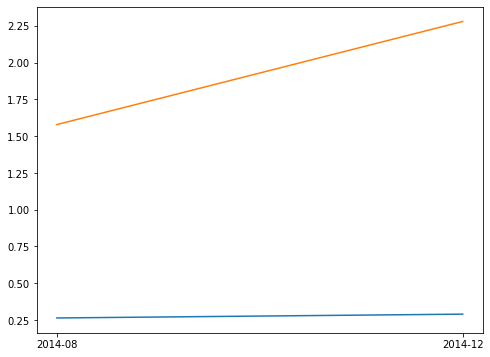

In [77]:
plt.figure(figsize=(8,6))
plt.plot(['2014-08', '2014-12'], [0.264, 0.29], label='precision@k')
plt.plot(['2014-08', '2014-12'], [1.579, 2.28], label='recall ratio')

In [27]:
query = Template("""
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM {{schema}}.model_adjustment_results_race_2way
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)

-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_white_to_nonwhite AS recall_w_to_nw,
       r.base_recall_nonwhite_to_white AS recall_nw_to_w
FROM {{schema}}.model_adjustment_results_race_2way r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_white_to_nonwhite AS recall_w_to_nw,
       r.adj_recall_nonwhite_to_white AS recall_nw_to_w
FROM {{schema}}.model_adjustment_results_race_2way r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_white_to_nonwhite AS recall_w_to_nw,
       r.adj_recall_nonwhite_to_white AS recall_nw_to_w
FROM {{schema}}.model_adjustment_results_race_2way r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      r.train_end_time AS train_end_time,
      r.past_train_end_time AS past_train_end_time,
      r.list_size, metric, parameter,
      r.value AS value,
      r.max_recall_ratio AS max_recall_ratio,
      r.recall_white_to_nonwhite AS recall_w_to_nw,
      r.recall_nonwhite_to_white AS recall_nw_to_w
FROM {{schema}}.composite_results_race_2way r
WHERE train_end_time > past_train_end_time
;
""")

params = {}
params['schema'] = 'hemank_bias_fexp_orig'
sql_orig = query.render(**params)
ts_df_orig = pd.read_sql(sql_orig, conn)

params['schema'] = 'hemank_bias_fexp_us'
sql_us = query.render(**params)
ts_df_us = pd.read_sql(sql_us, conn)

params['schema'] = 'hemank_bias_fexp_us_frac'
sql_us_frac = query.render(**params)
ts_df_us_frac = pd.read_sql(sql_us_frac, conn)

params['schema'] = 'hemank_bias_fexp_os'
sql_os = query.render(**params)
ts_df_os = pd.read_sql(sql_os, conn)

params['schema'] = 'hemank_bias_fexp_os_frac'
sql_os_frac = query.render(**params)
ts_df_os_frac = pd.read_sql(sql_os_frac, conn)

params['schema'] = 'hemank_bias_fexp_us_2'
sql_us_2 = query.render(**params)
ts_df_us_2 = pd.read_sql(sql_us_2, conn)

params['schema'] = 'hemank_bias_fexp_us_frac_2'
sql_us_frac_2 = query.render(**params)
ts_df_us_frac_2 = pd.read_sql(sql_us_frac_2, conn)

params['schema'] = 'hemank_bias_fexp_us_3'
sql_us_3 = query.render(**params)
ts_df_us_3 = pd.read_sql(sql_us_3, conn)

params['schema'] = 'hemank_bias_fexp_us_frac_3'
sql_us_frac_3 = query.render(**params)
ts_df_us_frac_3 = pd.read_sql(sql_us_frac_3, conn)


params['schema'] = 'hemank_bias_fexp_no_prot'
sql_nop = query.render(**params)
ts_df_nop = pd.read_sql(sql_nop, conn)

params['schema'] = 'hemank_bias_fexp_both_sampling_under'
sql_both_under = query.render(**params)
ts_df_both_under = pd.read_sql(sql_both_under, conn)

params['schema'] = 'hemank_bias_fexp_both_sampling_over'
sql_both_over = query.render(**params)
ts_df_both_over = pd.read_sql(sql_both_over, conn)

params['schema'] = 'hemank_bias_zafar'
sql_zafar = query.render(**params)
ts_df_zafar = pd.read_sql(sql_zafar, conn)

ts_df_zafar.head()

ProgrammingError: (psycopg2.errors.UndefinedTable) relation "hemank_bias_fexp_orig.model_adjustment_results_race_2way" does not exist
LINE 6:   FROM hemank_bias_fexp_orig.model_adjustment_results_race_2...
               ^

[SQL: 
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM hemank_bias_fexp_orig.model_adjustment_results_race_2way
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)

-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_white_to_nonwhite AS recall_w_to_nw,
       r.base_recall_nonwhite_to_white AS recall_nw_to_w
FROM hemank_bias_fexp_orig.model_adjustment_results_race_2way r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_white_to_nonwhite AS recall_w_to_nw,
       r.adj_recall_nonwhite_to_white AS recall_nw_to_w
FROM hemank_bias_fexp_orig.model_adjustment_results_race_2way r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_white_to_nonwhite AS recall_w_to_nw,
       r.adj_recall_nonwhite_to_white AS recall_nw_to_w
FROM hemank_bias_fexp_orig.model_adjustment_results_race_2way r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      r.train_end_time AS train_end_time,
      r.past_train_end_time AS past_train_end_time,
      r.list_size, metric, parameter,
      r.value AS value,
      r.max_recall_ratio AS max_recall_ratio,
      r.recall_white_to_nonwhite AS recall_w_to_nw,
      r.recall_nonwhite_to_white AS recall_nw_to_w
FROM hemank_bias_fexp_orig.composite_results_race_2way r
WHERE train_end_time > past_train_end_time
;]
(Background on this error at: http://sqlalche.me/e/f405)

In [6]:
import matplotlib.dates as mdates

months = mdates.MonthLocator([4,8,12])  # every month
months_fmt = mdates.DateFormatter('%b %y')

In [33]:
def plot(ts_df, x_plot, y_plot, algo_name):
    fig, ax = plt.subplots(figsize=(12,5))
    sns.lineplot(data=ts_df, x=x_plot, y=y_plot, hue='strategy', marker="o", ax=ax, linewidth=3.0, markersize=10)
    ax.set_ylabel(y_plot, fontsize=22)
    ax.set_xlabel('')

    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)

    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    handles, labels = ax.get_legend_handles_labels()
    hhandles = []
    llabels = []
    
    for i, lab in enumerate(labels):
        if lab not in ('strategy'):
            llabels.append(lab)
            hhandles.append(handles[i])
    ax.legend(hhandles, llabels, ncol=1, fontsize=12, loc='lower right')
    plt.tight_layout()
    plt.title(algo_name, fontsize=18)

<Figure size 720x3600 with 0 Axes>

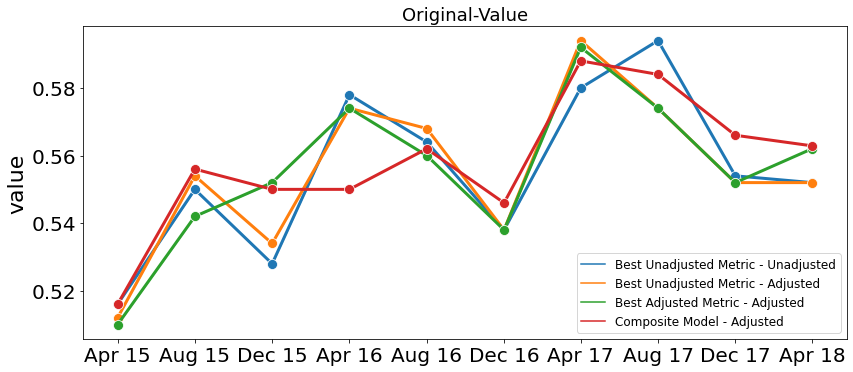

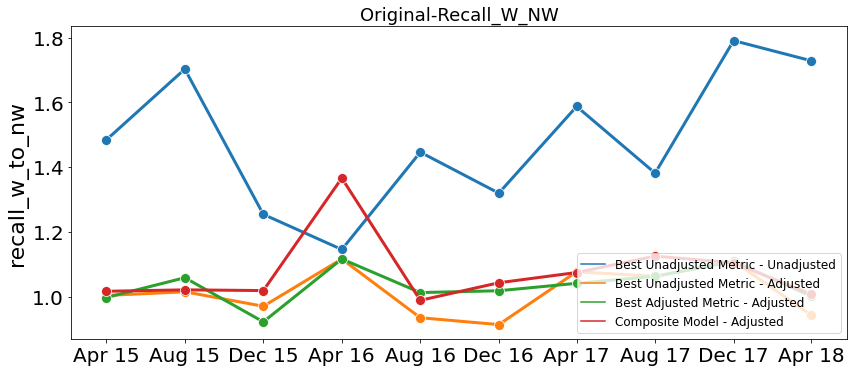

In [35]:
plt.figure(figsize=(10,50))
plot(ts_df_orig, 'train_end_time', 'value', 'Original-Value')
plot(ts_df_orig, 'train_end_time', 'recall_w_to_nw', 'Original-Recall_W_NW')

<Figure size 720x3600 with 0 Axes>

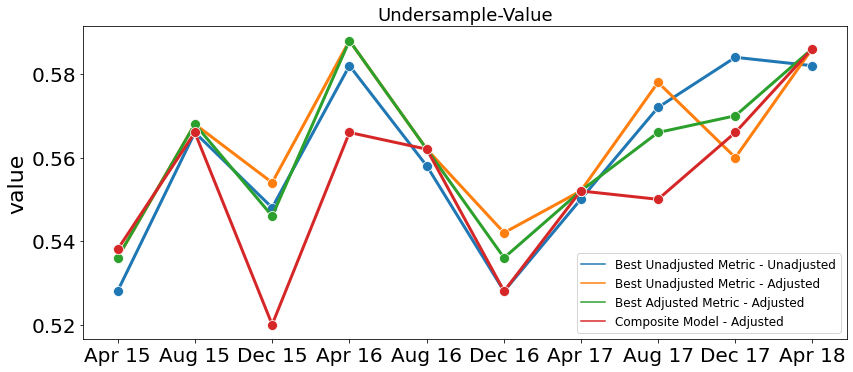

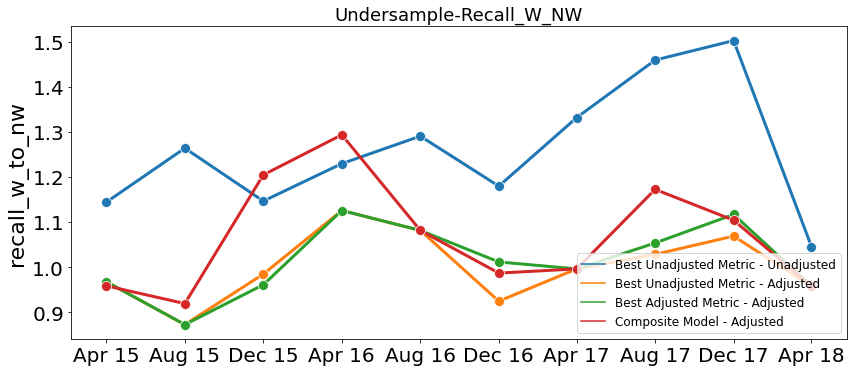

In [36]:
plt.figure(figsize=(10,50))
plot(ts_df_us, 'train_end_time', 'value', 'Undersample-Value')
plot(ts_df_us, 'train_end_time', 'recall_w_to_nw', 'Undersample-Recall_W_NW')

<Figure size 720x3600 with 0 Axes>

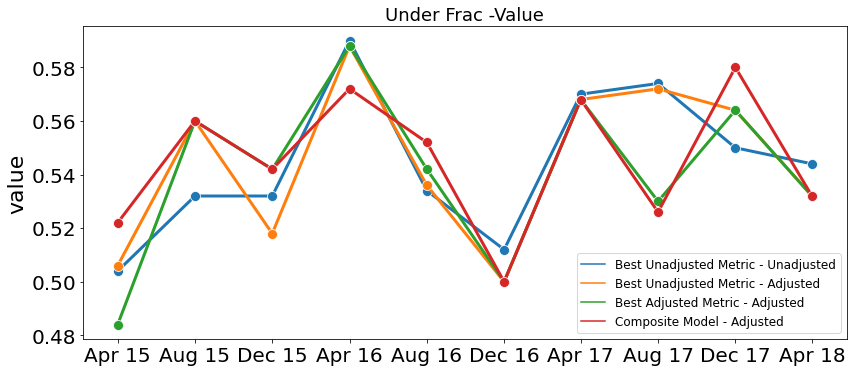

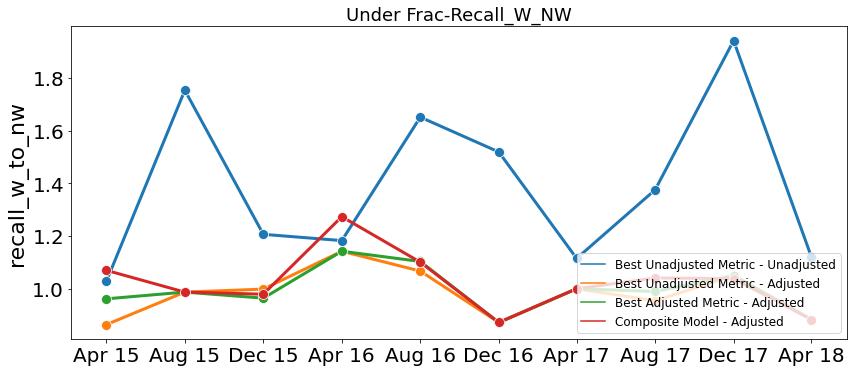

In [37]:
plt.figure(figsize=(10,50))
plot(ts_df_us_frac, 'train_end_time', 'value', 'Under Frac -Value')
plot(ts_df_us_frac, 'train_end_time', 'recall_w_to_nw', 'Under Frac-Recall_W_NW')

<Figure size 720x3600 with 0 Axes>

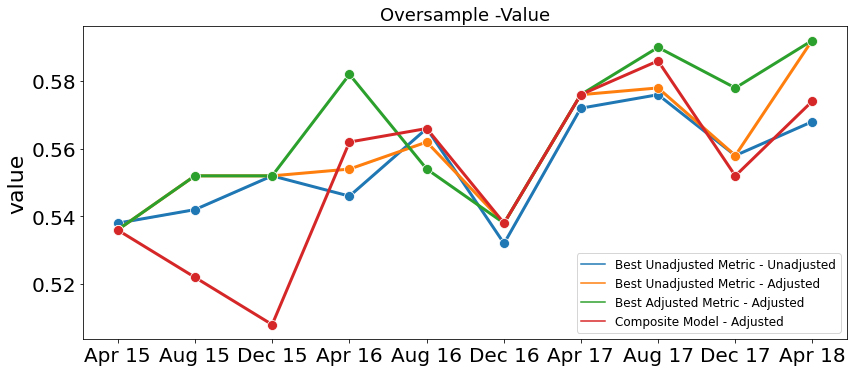

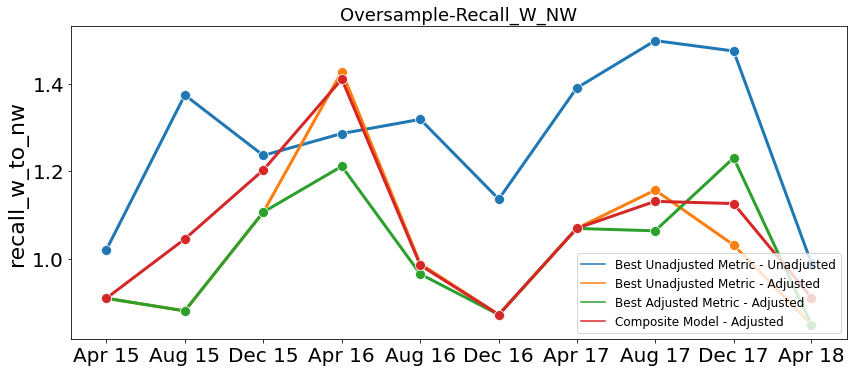

In [38]:
plt.figure(figsize=(10,50))
plot(ts_df_os, 'train_end_time', 'value', 'Oversample -Value')
plot(ts_df_os, 'train_end_time', 'recall_w_to_nw', 'Oversample-Recall_W_NW')

<Figure size 720x3600 with 0 Axes>

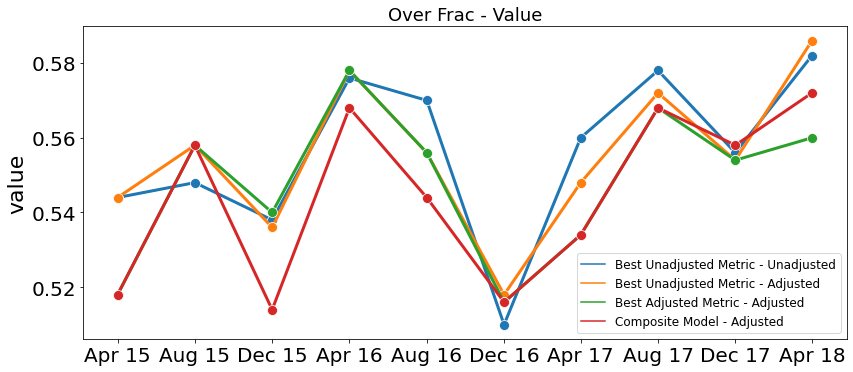

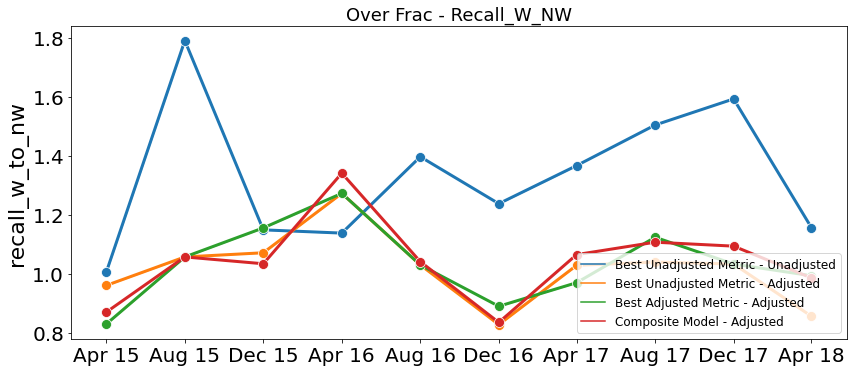

In [40]:
plt.figure(figsize=(10,50))
plot(ts_df_os_frac, 'train_end_time', 'value', 'Over Frac - Value')
plot(ts_df_os_frac, 'train_end_time', 'recall_w_to_nw', 'Over Frac - Recall_W_NW')

In [152]:
ts_df_orig['dataset'] = 'Original'
orig_df = ts_df_orig.rename(
    {'recall_w_to_nw': 'recall_disp', 
     'frac_white': 'frac_grp1', 
     'frac_nonwhite': 'frac_grp2'
    }, axis='columns')

ts_df_us['dataset'] = 'Under-1'
us_df = ts_df_us.rename(
    {'recall_w_to_nw': 'recall_disp', 
     'frac_white': 'frac_grp1', 
     'frac_nonwhite': 'frac_grp2'
    }, axis='columns')

ts_df_us_frac['dataset'] = 'Under-1-Fr'
us_df_frac = ts_df_us_frac.rename(
    {'recall_w_to_nw': 'recall_disp', 
     'frac_white': 'frac_grp1', 
     'frac_nonwhite': 'frac_grp2'
    }, axis='columns')

ts_df_os_frac['dataset'] = 'Oversample_Fr'
os_df_frac = ts_df_os_frac.rename(
    {'recall_w_to_nw': 'recall_disp', 
     'frac_white': 'frac_grp1', 
     'frac_nonwhite': 'frac_grp2'
    }, axis='columns')

ts_df_os['dataset'] = 'Oversample'
os_df = ts_df_os.rename(
    {'recall_w_to_nw': 'recall_disp', 
     'frac_white': 'frac_grp1', 
     'frac_nonwhite': 'frac_grp2'
    }, axis='columns')

ts_df_us_2['dataset'] = 'Under-2'
us_df_2 = ts_df_us_2.rename(    
    {'recall_w_to_nw': 'recall_disp', 
     'frac_white': 'frac_grp1', 
     'frac_nonwhite': 'frac_grp2'
    }, axis='columns')

ts_df_us_frac_2['dataset'] = 'Under-2-Fr'
us_df_2_fr = ts_df_us_frac_2.rename(  
    {'recall_w_to_nw': 'recall_disp', 
     'frac_white': 'frac_grp1', 
     'frac_nonwhite': 'frac_grp2'
    }, axis='columns')

ts_df_us_3['dataset'] = 'Under-3'
us_df_3 = ts_df_us_3.rename(
    {'recall_w_to_nw': 'recall_disp', 
     'frac_white': 'frac_grp1', 
     'frac_nonwhite': 'frac_grp2'
    }, axis='columns')

ts_df_us_frac_3['dataset'] = 'Under-3-Fr'
us_df_3_fr = ts_df_us_frac_3.rename(  
    {'recall_w_to_nw': 'recall_disp', 
     'frac_white': 'frac_grp1', 
     'frac_nonwhite': 'frac_grp2'
    }, axis='columns')

ts_df_nop['dataset'] = 'No-Protected'
nop_df = ts_df_nop.rename(  
    {'recall_w_to_nw': 'recall_disp', 
     'frac_white': 'frac_grp1', 
     'frac_nonwhite': 'frac_grp2'
    }, axis='columns')

ts_df_both_under['dataset'] = 'Both-Under'
both_under_df = ts_df_both_under.rename(
    {'recall_w_to_nw': 'recall_disp',
     'frac_white':'frac_grp1',
     'frac_nonwhite':'frac_grp2'
    }, axis='columns')

ts_df_both_over['dataset'] = 'Both-Over'
both_over_df = ts_df_both_over.rename(
    {'recall_w_to_nw': 'recall_disp',
     'frac_white':'frac_grp1',
     'frac_nonwhite':'frac_grp2'
    }, axis='columns')

ts_df_zafar['dataset'] = 'Zafar'
zafar_df = ts_df_zafar.rename(
    {'recall_w_to_nw': 'recall_disp',
     'frac_white':'frac_grp1',
     'frac_nonwhite':'frac_grp2'
    }, axis='columns'
)

In [153]:
comp_os_df = pd.concat([nop_df, orig_df, os_df, os_df_frac])
comp_us_df = pd.concat([both_under_df, orig_df, us_df, us_df_frac, us_df_2, us_df_2_fr, us_df_3, us_df_3_fr])
comp_zaf_df = pd.concat([orig_df, zafar_df])

comp_df = pd.concat([orig_df, nop_df, us_df, us_df_frac, us_df_2, us_df_2_fr, us_df_3, us_df_3_fr, both_under_df, zafar_df])

In [154]:
comp_zaf_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index().sort_index()

,dataset,strategy,value,recall_disp
0,Original,Best Adjusted Metric - Adjusted,0.554353,1.029397
1,Original,Best Unadjusted Metric - Adjusted,0.555176,1.007245
2,Original,Best Unadjusted Metric - Unadjusted,0.553412,1.457731
3,Original,Composite Model - Adjusted,0.558087,1.076196


In [98]:
comp_us_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index().sort_index()

,dataset,strategy,value,recall_disp
0,Both-Under,Best Adjusted Metric - Adjusted,0.536471,1.048155
1,Both-Under,Best Unadjusted Metric - Adjusted,0.534588,0.995728
2,Both-Under,Best Unadjusted Metric - Unadjusted,0.528706,1.339938
3,Both-Under,Composite Model - Adjusted,0.532478,1.062707
4,Original,Best Adjusted Metric - Adjusted,0.555529,1.027450
5,Original,Best Unadjusted Metric - Adjusted,0.554471,1.010017
6,Original,Best Unadjusted Metric - Unadjusted,0.553412,1.457731
7,Original,Composite Model - Adjusted,0.558087,1.076196
8,Under-1,Best Adjusted Metric - Adjusted,0.558706,1.009566
9,Under-1,Best Unadjusted Metric - Adjusted,0.560471,0.997807


In [125]:
comp_zaf_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index().sort_index()

,dataset,strategy,value,recall_disp
0,Original,Best Adjusted Metric - Adjusted,0.555529,1.027450
1,Original,Best Unadjusted Metric - Adjusted,0.554471,1.010017
2,Original,Best Unadjusted Metric - Unadjusted,0.553412,1.457731
3,Original,Composite Model - Adjusted,0.558087,1.076196
4,Zafar,Best Adjusted Metric - Adjusted,0.172400,0.998503
5,Zafar,Best Unadjusted Metric - Adjusted,0.172400,0.998503
6,Zafar,Best Unadjusted Metric - Unadjusted,0.172133,0.921775
7,Zafar,Composite Model - Adjusted,0.180444,1.001188


,strategy,train_end_time,past_train_end_time,list_size,metric,parameter,value,max_recall_ratio,recall_disp,recall_nw_to_w,dataset
0,Best Unadjusted Metric - Unadjusted,2015-12-01,2014-12-01,500,precision@,500_abs,0.528,1.254028,1.254028,0.797430,Original
1,Best Unadjusted Metric - Unadjusted,2015-12-01,2014-12-01,500,precision@,500_abs,0.528,1.254028,1.254028,0.797430,Original
2,Best Unadjusted Metric - Unadjusted,2016-04-01,2015-04-01,500,precision@,500_abs,0.578,1.145387,1.145387,0.873068,Original
3,Best Unadjusted Metric - Unadjusted,2016-04-01,2015-04-01,500,precision@,500_abs,0.578,1.145387,1.145387,0.873068,Original
4,Best Unadjusted Metric - Unadjusted,2017-08-01,2016-08-01,500,precision@,500_abs,0.594,1.381415,1.381415,0.723895,Original
5,Best Unadjusted Metric - Unadjusted,2015-04-01,2014-04-01,500,precision@,500_abs,0.516,1.484238,1.484238,0.673747,Original
6,Best Unadjusted Metric - Unadjusted,2015-04-01,2014-04-01,500,precision@,500_abs,0.516,1.484238,1.484238,0.673747,Original
7,Best Unadjusted Metric - Unadjusted,2015-08-01,2014-08-01,500,precision@,500_abs,0.550,1.703092,1.703092,0.587167,Original
8,Best Unadjusted Metric - Unadjusted,2015-08-01,2014-08-01,500,precision@,500_abs,0.550,1.703092,1.703092,0.587167,Original
9,Best Unadjusted Metric - Unadjusted,2016-08-01,2015-08-01,500,precision@,500_abs,0.564,1.446262,1.446262,0.691438,Original


['#001c7f', '#b1400d', '#12711c', '#8c0800', '#591e71', '#592f0d', '#a23582', '#3c3c3c', '#b8850a', '#006374', '#001c7f', '#b1400d']
0
Both-Under
1
No-Protected
2
Original
3
Under-1
4
Under-1-Fr
5
Under-2
6
Under-2-Fr
7
Under-3
8
Under-3-Fr
9
Zafar


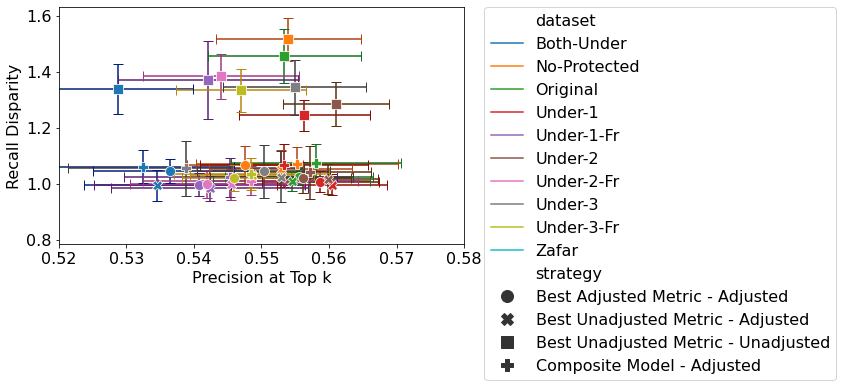

In [145]:
import numpy as np
colorlist = sns.color_palette("dark",12).as_hex()
print(colorlist)

#arr_dfs = ['Zafar', 'Original']
#comp_temp_df = pd.concat([zafar_df, orig_df])

fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=comp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index(), 
              x='value', y='recall_disp', 
              hue='dataset', 
#              marker="o", 
              style='strategy',
              markers=True,
              color=colorlist,
              markersize=10,
              dashes=None,
              ci=None,
              ax=ax)

data=comp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()
unique_dfs = np.unique(data['dataset'])

for i in range(len(unique_dfs)):
    print(i)
    print(unique_dfs[i])
    tmp_df = comp_df.loc[comp_df['dataset'] == unique_dfs[i], ].copy()
    
    x_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['value'].values)
    y_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['recall_disp'].values)

    prec_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['value'].sem().values
    disp_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['recall_disp'].sem().values
    #colors = sns.color_palette().as_hex()[i]
    color = colorlist[i]
    
    ax.errorbar(x_coords, y_coords, 
                xerr=prec_errors, 
                yerr=disp_errors,
                ecolor=colorlist[i], fmt=' ', zorder=-1, capsize=5)

ax.set_ylabel('Recall Disparity', fontsize=16)
ax.set_xlabel('Precision at Top k', fontsize=16)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in list(comp_df['dataset'].unique()) + ['dataset', 'strategy']:
        handles[i].set_linestyle("")
    hhandles.append(handles[i])
    llabels.append(lab)
ax.legend(hhandles, llabels, fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., markerscale=2)
    
ax.set_xlim([0.52, 0.58])
fig.tight_layout()

['#001c7f', '#b1400d', '#12711c', '#8c0800', '#591e71', '#592f0d', '#a23582', '#3c3c3c', '#b8850a', '#006374', '#001c7f', '#b1400d']
Both-Under
Original
Under-1
Under-1-Fr
Under-2
Under-2-Fr
Under-3
Under-3-Fr


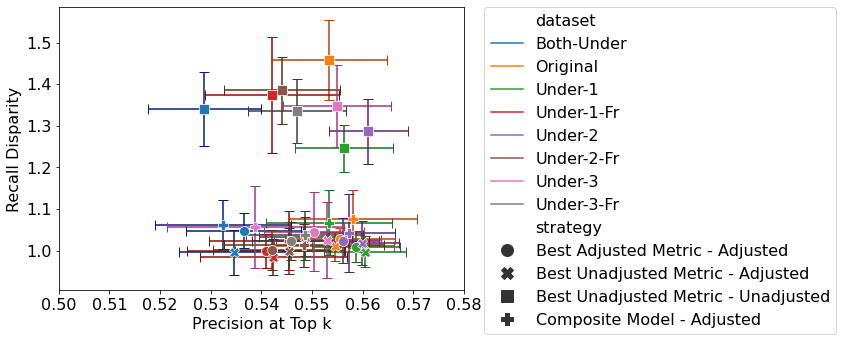

In [146]:
colorlist = sns.color_palette("dark",12).as_hex()
print(colorlist)

fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=comp_us_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index(), 
              x='value', y='recall_disp', 
              hue='dataset', 
#              marker="o", 
              style='strategy',
              markers=True,
              color=colorlist,
              markersize=10,
              dashes=None,
              ci=None,
              ax=ax)


for i, ds in enumerate(comp_us_df['dataset'].unique()):
    print(comp_us_df['dataset'].unique()[i])
    tmp_df = comp_us_df.loc[comp_us_df['dataset'] == ds, ].copy()
    
    x_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['value'].values)
    y_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['recall_disp'].values)

    prec_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['value'].sem().values
    disp_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['recall_disp'].sem().values
    #colors = sns.color_palette().as_hex()[i]
    color = colorlist[i]
    
    ax.errorbar(x_coords, y_coords, 
                xerr=prec_errors, 
                yerr=disp_errors,
                ecolor=colorlist[i], fmt=' ', zorder=-1, capsize=5)


ax.set_ylabel('Recall Disparity', fontsize=16)
ax.set_xlabel('Precision at Top k', fontsize=16)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in list(comp_df['dataset'].unique()) + ['dataset', 'strategy']:
        handles[i].set_linestyle("")
    hhandles.append(handles[i])
    llabels.append(lab)
ax.legend(hhandles, llabels, fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., markerscale=2)
    
ax.set_xlim([0.50, 0.58])
fig.tight_layout()

['#001c7f', '#b1400d', '#12711c', '#8c0800', '#591e71', '#592f0d', '#a23582', '#3c3c3c', '#b8850a', '#006374', '#001c7f', '#b1400d']
No-Protected
Original
Oversample
Oversample_Fr


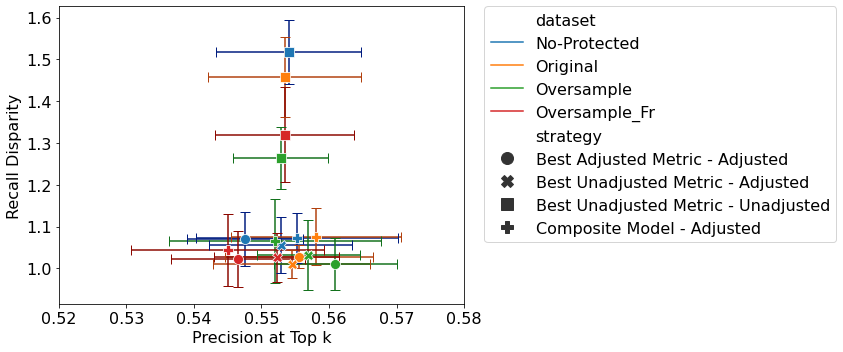

In [105]:
colorlist = sns.color_palette("dark",12).as_hex()
print(colorlist)

fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=comp_os_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index(), 
              x='value', y='recall_disp', 
              hue='dataset', 
#              marker="o", 
              style='strategy',
              markers=True,
              color=colorlist,
              markersize=10,
              dashes=None,
              ci=None,
              ax=ax)


for i, ds in enumerate(comp_os_df['dataset'].unique()):
    print(comp_os_df['dataset'].unique()[i])
    tmp_df = comp_os_df.loc[comp_os_df['dataset'] == ds, ].copy()
    
    x_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['value'].values)
    y_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['recall_disp'].values)

    prec_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['value'].sem().values
    disp_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['recall_disp'].sem().values
    #colors = sns.color_palette().as_hex()[i]
    color = colorlist[i]
    
    ax.errorbar(x_coords, y_coords, 
                xerr=prec_errors, 
                yerr=disp_errors,
                ecolor=colorlist[i], fmt=' ', zorder=-1, capsize=5)


ax.set_ylabel('Recall Disparity', fontsize=16)
ax.set_xlabel('Precision at Top k', fontsize=16)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in list(comp_df['dataset'].unique()) + ['dataset', 'strategy']:
        handles[i].set_linestyle("")
    hhandles.append(handles[i])
    llabels.append(lab)
ax.legend(hhandles, llabels, fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., markerscale=2)
    
ax.set_xlim([0.52, 0.58])
fig.tight_layout()

['#001c7f', '#b1400d', '#12711c', '#8c0800', '#591e71', '#592f0d', '#a23582', '#3c3c3c', '#b8850a', '#006374', '#001c7f', '#b1400d']
Original
Zafar


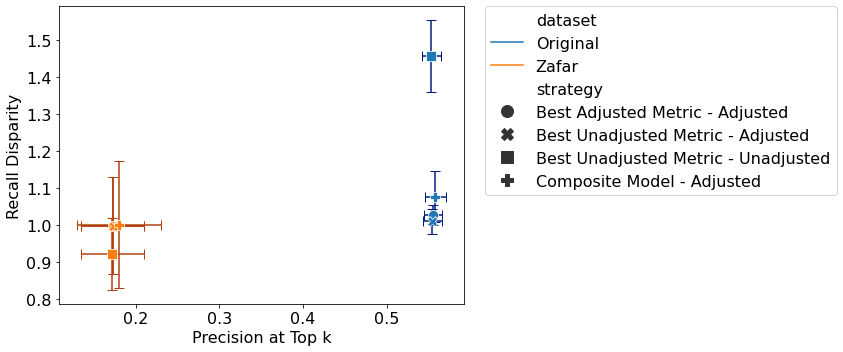

In [128]:
colorlist = sns.color_palette("dark",12).as_hex()
print(colorlist)

fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=comp_zaf_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index(), 
              x='value', y='recall_disp', 
              hue='dataset', 
#              marker="o", 
              style='strategy',
              markers=True,
              color=colorlist,
              markersize=10,
              dashes=None,
              ci=None,
              ax=ax)


for i, ds in enumerate(comp_zaf_df['dataset'].unique()):
    print(comp_zaf_df['dataset'].unique()[i])
    tmp_df = comp_zaf_df.loc[comp_zaf_df['dataset'] == ds, ].copy()
    
    x_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['value'].values)
    y_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['recall_disp'].values)

    prec_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['value'].sem().values
    disp_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['recall_disp'].sem().values
    #colors = sns.color_palette().as_hex()[i]
    color = colorlist[i]
    
    ax.errorbar(x_coords, y_coords, 
                xerr=prec_errors, 
                yerr=disp_errors,
                ecolor=colorlist[i], fmt=' ', zorder=-1, capsize=5)


ax.set_ylabel('Recall Disparity', fontsize=16)
ax.set_xlabel('Precision at Top k', fontsize=16)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in list(comp_df['dataset'].unique()) + ['dataset', 'strategy']:
        handles[i].set_linestyle("")
    hhandles.append(handles[i])
    llabels.append(lab)
ax.legend(hhandles, llabels, fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., markerscale=2)
    
#ax.set_xlim([0.52, 0.58])
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_nop, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
print(labels)
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Original", fontsize=20)

fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_nop, x='train_end_time', y='recall_w_to_nw', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Recall W-NW', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
print(labels)
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("No Protected", fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_us_frac, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
print(labels)
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Undersampling", fontsize=20)

fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_us_frac, x='train_end_time', y='recall_w_to_nw', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Recall W-NW', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
print(labels)
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Undersampling", fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_os_frac, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
print(labels)
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Oversampling", fontsize=20)

fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_os_frac, x='train_end_time', y='recall_w_to_nw', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Recall W-NW', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
print(labels)
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Oversampling", fontsize=20)

In [ ]:
ts_df_os_frac.groupby(['strategy']).describe()

## No Protected

In [ ]:
import time
start_time = time.time()
myRA_noprotected = ra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_alternatives',
        experiment_hashes='655c17798164e08f74ef2dfaf8bf8e74',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_w_nw'
)
print("Time Taken="+str(time.time()-start_time))

In [ ]:
sql = """
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM hemank_bias_alternatives.model_adjustment_results_race_w_nw
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)
-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_w_to_nw AS recall_w_to_nw,
       r.base_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives.model_adjustment_results_race_w_nw r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_nw AS recall_w_to_nw,
       r.adj_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives.model_adjustment_results_race_w_nw r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_nw AS recall_w_to_nw,
       r.adj_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives.model_adjustment_results_race_w_nw r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      r.train_end_time AS train_end_time,
      r.past_train_end_time AS past_train_end_time,
      r.list_size, metric, parameter,
      r.value AS value,
      r.max_recall_ratio AS max_recall_ratio,
      r.recall_w_to_nw AS recall_w_to_nw,
      r.recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives.composite_results_race_w_nw r
WHERE train_end_time > past_train_end_time
;
"""

ts_df_noprot = pd.read_sql(sql, conn)

## Undersampling - Abs

In [ ]:
import time
start_time = time.time()
myRA_us_0 = ra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_alternatives_undersampling_0',
        experiment_hashes='606b59cfe2ceffde5cd3d17d9c01c762',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_w_nw'
)
print("Time Taken="+str(time.time()-start_time))

In [ ]:
sql = """
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM hemank_bias_alternatives_undersampling_0.model_adjustment_results_race_w_nw
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)
-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_w_to_nw AS recall_w_to_nw,
       r.base_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_undersampling_0.model_adjustment_results_race_w_nw r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_nw AS recall_w_to_nw,
       r.adj_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_undersampling_0.model_adjustment_results_race_w_nw r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_nw AS recall_w_to_nw,
       r.adj_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_undersampling_0.model_adjustment_results_race_w_nw r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      r.train_end_time AS train_end_time,
      r.past_train_end_time AS past_train_end_time,
      r.list_size, metric, parameter,
      r.value AS value,
      r.max_recall_ratio AS max_recall_ratio,
      r.recall_w_to_nw AS recall_w_to_nw,
      r.recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_undersampling_0.composite_results_race_w_nw r
WHERE train_end_time > past_train_end_time
;
"""
ts_df_us_0 = pd.read_sql(sql, conn)

## Undersampling - Fractional

In [ ]:
import time
start_time = time.time()
myRA_us_frac_0 = ra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_alternatives_undersampling_frac_0',
        experiment_hashes='efa2aa62e8cc0141fb783a2edff70e97',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_w_nw'
)
print("Time Taken="+str(time.time()-start_time))

In [ ]:
sql = """
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM hemank_bias_alternatives_undersampling_frac_0.model_adjustment_results_race_w_nw
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)
-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_w_to_nw AS recall_w_to_nw,
       r.base_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_undersampling_frac_0.model_adjustment_results_race_w_nw r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_nw AS recall_w_to_nw,
       r.adj_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_undersampling_frac_0.model_adjustment_results_race_w_nw r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_nw AS recall_w_to_nw,
       r.adj_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_undersampling_frac_0.model_adjustment_results_race_w_nw r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      r.train_end_time AS train_end_time,
      r.past_train_end_time AS past_train_end_time,
      r.list_size, metric, parameter,
      r.value AS value,
      r.max_recall_ratio AS max_recall_ratio,
      r.recall_w_to_nw AS recall_w_to_nw,
      r.recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_undersampling_frac_0.composite_results_race_w_nw r
WHERE train_end_time > past_train_end_time
;
"""
ts_df_us_frac_0 = pd.read_sql(sql, conn)

## Oversampling - Abs

In [ ]:
import time
start_time = time.time()
myRA_os_0 = ra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_alternatives_oversampling_0',
        experiment_hashes='78491e19cb1fbf45e55a456ea5cd38a4',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_w_nw'
)
print("Time Taken="+str(time.time()-start_time))

In [ ]:
sql = """
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM hemank_bias_alternatives_oversampling_0.model_adjustment_results_race_w_nw
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)
-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_w_to_nw AS recall_w_to_nw,
       r.base_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_oversampling_0.model_adjustment_results_race_w_nw r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_nw AS recall_w_to_nw,
       r.adj_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_oversampling_0.model_adjustment_results_race_w_nw r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_nw AS recall_w_to_nw,
       r.adj_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_oversampling_0.model_adjustment_results_race_w_nw r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      r.train_end_time AS train_end_time,
      r.past_train_end_time AS past_train_end_time,
      r.list_size, metric, parameter,
      r.value AS value,
      r.max_recall_ratio AS max_recall_ratio,
      r.recall_w_to_nw AS recall_w_to_nw,
      r.recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_oversampling_0.composite_results_race_w_nw r
WHERE train_end_time > past_train_end_time
;
"""
ts_df_os_0 = pd.read_sql(sql, conn)

## Oversampling Fraction

In [ ]:
import time
start_time = time.time()
myRA_os_0 = ra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_alternatives_oversampling_frac_0',
        experiment_hashes='ce22cf6ac11a6e74517b56e0257c9acb',
        date_pairs=date_pairs,
        list_sizes=[500],
        entity_demos='hemank_bias_alternatives.entity_demos',
        #entity_demos='kit_bias_class_test.entity_demos',
        demo_col='race_w_nw'
)
print("Time Taken="+str(time.time()-start_time))

In [ ]:
sql = """
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM hemank_bias_alternatives_oversampling_frac_0.model_adjustment_results_race_w_nw
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)
-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_w_to_nw AS recall_w_to_nw,
       r.base_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_oversampling_frac_0.model_adjustment_results_race_w_nw r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_nw AS recall_w_to_nw,
       r.adj_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_oversampling_frac_0.model_adjustment_results_race_w_nw r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_nw AS recall_w_to_nw,
       r.adj_recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_oversampling_frac_0.model_adjustment_results_race_w_nw r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      r.train_end_time AS train_end_time,
      r.past_train_end_time AS past_train_end_time,
      r.list_size, metric, parameter,
      r.value AS value,
      r.max_recall_ratio AS max_recall_ratio,
      r.recall_w_to_nw AS recall_w_to_nw,
      r.recall_nw_to_w AS recall_nw_to_w
FROM hemank_bias_alternatives_oversampling_frac_0.composite_results_race_w_nw r
WHERE train_end_time > past_train_end_time
;
"""
ts_df_os_frac_0 = pd.read_sql(sql, conn)

### Plotting all of this together

In [ ]:
import matplotlib.dates as mdates

months = mdates.MonthLocator([4,8,12])  # every month
months_fmt = mdates.DateFormatter('%b %y')

#mod_ts_df = ts_df[ts_df['train_end_time']>'2011-05-01']
#mod_ts_df_1k = mod_ts_df[mod_ts_df['list_size']==1000]
#mod_ts_df_5k = mod_ts_df[mod_ts_df['list_size']==5000]

#print(len(mod_ts_df_1k), len(mod_ts_df_5k), min(mod_ts_df['train_end_time']))

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_orig, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Original", fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_orig, x='train_end_time', y='recall_w_to_nw', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Original", fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_noprot, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("No Protected")

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_noprot, x='train_end_time', y='recall_w_to_nw', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("No Protected")

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_us_0, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Undersampling Absolute")

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_us_0, x='train_end_time', y='recall_w_to_nw', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Undersampling Absolute")

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_us_frac_0, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Undersampling Fraction", fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_us_frac_0, x='train_end_time', y='recall_w_to_nw', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Undersampling Fraction", fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_os_0, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Oversampling Absolute", fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_os_0, x='train_end_time', y='recall_w_to_nw', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Oversampling Absolute", fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_os_frac_0, x='train_end_time', y='value', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Oversampling Fraction", fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=ts_df_os_frac_0, x='train_end_time', y='recall_w_to_nw', hue='strategy', marker="o", ax=ax, 
             linewidth=3.0, markersize=10)


ax.set_ylabel('Value', fontsize=22)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in ('strategy'):
        llabels.append(lab)
        hhandles.append(handles[i])
ax.legend(hhandles, llabels, ncol=1, fontsize=15, loc='upper right')
#ax.set_ylim([0.3,5.0])
plt.tight_layout()
plt.title("Oversampling Fraction", fontsize=20)

In [ ]:
ts_df_os_frac_0.head()

In [ ]:
sql = """
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM hemank_bias_alternatives_oversampling_frac_0.model_adjustment_results_race_w_nw
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)
-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_w_to_nw AS recall_w_to_nw,
       r.base_recall_nw_to_w AS recall_nw_to_w,
       r.base_frac_w,
       r.base_frac_nw,
       r.base_recall_w,
       r.base_recall_nw,
       r.adj_frac_w,
       r.adj_frac_nw,
       r.adj_recall_w,
       r.adj_recall_nw
FROM hemank_bias_alternatives_oversampling_frac_0.model_adjustment_results_race_w_nw r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_w_to_nw AS recall_w_to_nw,
       r.adj_recall_nw_to_w AS recall_nw_to_w,
       r.base_frac_w,
       r.base_frac_nw,
       r.base_recall_w,
       r.base_recall_nw,
       r.adj_frac_w,
       r.adj_frac_nw,
       r.adj_recall_w,
       r.adj_recall_nw       
FROM hemank_bias_alternatives_oversampling_frac_0.model_adjustment_results_race_w_nw r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time
;
"""
ts_df_os_frac_0 = pd.read_sql(sql, conn)

In [ ]:
ts_df_os_frac_0

In [73]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [67]:
import datetime

In [78]:
str(datetime.now()+relativedelta(years=1))

'2021-07-16 20:40:39.895400'

In [91]:
def get_train_test_matrices(conn, experiment_hash):
    query = """
    select matrix_id, matrix_uuid, matrix_type from
    model_metadata.matrices where built_by_experiment='%s'
    """%(str(experiment_hash))

    df = pd.read_sql(query, conn)
    train_matrices = df[df['matrix_type'] == 'train']
    test_matrices = df[df['matrix_type'] == 'test']

    return train_matrices, test_matrices

def make_train_test_matrices(FILE_PATH, train_matrices, test_matrices, label_col):    
    matrix_info = []
    
    test_matrix_names_to_ids = {}
    train_matrix_names_to_ids = {}
    
    for i in range(len(test_matrices)):
        test_matrix_uuid = test_matrices.iloc[i]['matrix_uuid']
        test_matrix_id = test_matrices.iloc[i]['matrix_id']
        test_matrix_names_to_ids[test_matrix_uuid] = test_matrix_id
        
    for i in range(len(train_matrices)):
        train_matrix_uuid = train_matrices.iloc[i]['matrix_uuid']
        train_matrix_id = train_matrices.iloc[i]['matrix_id']
        train_matrix_names_to_ids[train_matrix_uuid] = train_matrix_id

    

    for i in range(len(train_matrices)):
        train_matrix_id = train_matrices.iloc[i]['matrix_uuid']
        matrix_config = yaml.load(open(os.path.join(FILE_PATH, train_matrix_id+".yaml"), 'r'))
        train_matrix_end_time = matrix_config['end_time']
        test_matrix_str = label_col+"_"+str(train_matrix_end_time)+"_"+str(train_matrix_end_time+relativedelta(years=1))

        fname = os.path.join(FILE_PATH, test_matrix_str)
        if(os.path.exists(fname)):
            print("Matrix Exists")            
            matrix_info.append([train_matrices.iloc[i]['matrix_uuid'], test_matrix_str])
        else:
            print("Some error"+str(fname))

    return matrix_info

In [87]:
FILE_PATH = '/mnt/data/experiment_data/peeps/joco_zafar/matrices'
label_col = 'booking_view_warr_bw_1y'
import triage.util.structs

In [92]:
train_m, test_m = get_train_test_matrices(conn, '9f9bad1aa7a2f5c83a7ef7a1deb0b201')
make_train_test_matrices(FILE_PATH, train_m, test_m, label_col)

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:19: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


Some error/mnt/data/experiment_data/peeps/joco_zafar/matrices/booking_view_warr_bw_1y_2017-08-01 00:00:00_2018-08-01 00:00:00
Some error/mnt/data/experiment_data/peeps/joco_zafar/matrices/booking_view_warr_bw_1y_2017-12-01 00:00:00_2018-12-01 00:00:00
Some error/mnt/data/experiment_data/peeps/joco_zafar/matrices/booking_view_warr_bw_1y_2016-04-01 00:00:00_2017-04-01 00:00:00
Some error/mnt/data/experiment_data/peeps/joco_zafar/matrices/booking_view_warr_bw_1y_2014-12-01 00:00:00_2015-12-01 00:00:00
Some error/mnt/data/experiment_data/peeps/joco_zafar/matrices/booking_view_warr_bw_1y_2017-04-01 00:00:00_2018-04-01 00:00:00
Some error/mnt/data/experiment_data/peeps/joco_zafar/matrices/booking_view_warr_bw_1y_2016-12-01 00:00:00_2017-12-01 00:00:00
Some error/mnt/data/experiment_data/peeps/joco_zafar/matrices/booking_view_warr_bw_1y_2016-08-01 00:00:00_2017-08-01 00:00:00
Some error/mnt/data/experiment_data/peeps/joco_zafar/matrices/booking_view_warr_bw_1y_2015-12-01 00:00:00_2016-12-01 0

[]

In [21]:
query = """
select entity_id, race_2way from hemank_bias_alternatives.currmatch_entity_demos
"""
df = pd.read_sql(query, conn)
print(len(df))
entities = df['entity_id'].values
races = df['race_2way'].values

entity_to_attrib = {}
for i in range(len(entities)):
    entity_id = entities[i]
    race_info = races[i]
    entity_to_attrib[entity_id] = race_info


437523


In [103]:
query_train = """
select matrix_id, matrix_type, matrix_uuid from model_metadata.matrices where matrix_type='train'
and built_by_experiment='9f9bad1aa7a2f5c83a7ef7a1deb0b201'
"""
df_train = pd.read_sql(query_train, conn)
print(df_train.iloc[0][['matrix_id','matrix_uuid']])

query_test = """
select matrix_id, matrix_type, matrix_uuid from model_metadata.matrices where matrix_type='test'
and built_by_experiment='9f9bad1aa7a2f5c83a7ef7a1deb0b201'
"""
df_test = pd.read_sql(query_test, conn)
print(df_test.iloc[0][['matrix_id','matrix_uuid']])

matrix_id      booking_view_warr_bw_1y_binary_2016-08-01 00:0...
matrix_uuid                     4196c476d8a7a3e74923333059d3fb26
Name: 0, dtype: object
matrix_id      booking_view_warr_bw_1y_binary_2017-04-01 00:0...
matrix_uuid                     3f46159319b28e87db57f89e993cbdc5
Name: 0, dtype: object


In [24]:
US_FILE_PATH = '/mnt/data/experiment_data/peeps/joco_oversampled_race/oversampled_random_0/matrices'
train_matrix = pd.read_csv(os.path.join(US_FILE_PATH, '4196c476d8a7a3e74923333059d3fb26.csv.gz'), compression='gzip')
test_matrix = pd.read_csv(os.path.join(US_FILE_PATH, '3f46159319b28e87db57f89e993cbdc5.csv.gz'), compression='gzip')

entity_col = []
train_entities = train_matrix['entity_id'].values
for i in range(len(train_entities)):
    try:
        race_info = entity_to_attrib[train_entities[i]]
        entity_col.append(race_info)
    except KeyError as e:
        entity_col.append("MISSING")
        print(train_entities[i])

demo_cname = 'race_2way'
label_name = 'booking_view_warr_bw_1y'
train_matrix[demo_cname] = entity_col
train_matrix = train_matrix[train_matrix[demo_cname]!='MISSING']

print(np.sum((train_matrix[demo_cname] == 'White') & (train_matrix[label_name]==0.0)))
print(np.sum((train_matrix[demo_cname] == 'White') & (train_matrix[label_name]==1.0)))
print(np.sum((train_matrix[demo_cname] == 'White')))
print("---")
print(np.sum((train_matrix[demo_cname] == 'NonWhite') & (train_matrix[label_name]==0.0)))
print(np.sum((train_matrix[demo_cname] == 'NonWhite') & (train_matrix[label_name]==1.0)))
print(np.sum((train_matrix[demo_cname] == 'NonWhite')))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135


4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364


6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6360
6361
6362
6363
6364
6365
6366
6367
6368
6369
6370
6371
6372
6373
6374
6375


8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379
8380
8381
8382
8383
8384
8385
8386
8387
8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400


10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
1040

12450
12451
12452
12453
12454
12455
12456
12457
12458
12459
12460
12461
12462
12463
12464
12465
12466
12467
12468
12469
12470
12471
12472
12473
12474
12475
12476
12477
12478
12479
12480
12481
12482
12483
12484
12485
12486
12487
12488
12489
12490
12491
12492
12493
12494
12495
12496
12497
12498
12499
12500
12501
12502
12503
12504
12505
12506
12507
12508
12509
12510
12511
12512
12513
12514
12515
12516
12517
12518
12519
12520
12521
12522
12523
12524
12525
12526
12527
12528
12529
12530
12531
12532
12533
12534
12535
12536
12537
12538
12539
12540
12541
12542
12543
12544
12545
12546
12547
12548
12549
12550
12551
12552
12553
12554
12555
12556
12557
12558
12559
12560
12561
12562
12563
12564
12565
12566
12567
12568
12569
12570
12571
12572
12573
12574
12575
12576
12577
12578
12579
12580
12581
12582
12583
12584
12585
12586
12587
12588
12589
12590
12591
12592
12593
12594
12595
12596
12597
12598
12599
12600
12601
12602
12603
12604
12605
12606
12607
12608
12609
12610
12611
12612
12613
12614
12615
1261

14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
14483
14484
14485
14486
14487
14488
14489
14490
14491
14492
14493
14494
14495
14496
14497
14498
14499
14500
14501
14502
14503
14504
14505
14506
14507
14508
14509
14510
14511
14512
14513
14514
14515
14516
14517
14518
14519
14520
14521
14522
14523
14524
14525
14526
14527
14528
14529
14530
14531
14532
14533
14534
14535
14536
14537
14538
14539
14540
14541
14542
14543
14544
14545
14546
14547
14548
14549
14550
14551
14552
14553
14554
14555
14556
14557
14558
14559
14560
14561
14562
14563
14564
14565
14566
14567
14568
14569
14570
14571
14572
14573
14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
14597
1459

16475
16476
16477
16478
16479
16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
16501
16502
16503
16504
16505
16506
16507
16508
16509
16510
16511
16512
16513
16514
16515
16516
16517
16518
16519
16520
16521
16522
16523
16524
16525
16526
16527
16528
16529
16530
16531
16532
16533
16534
16535
16536
16537
16538
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
16549
16550
16551
16552
16553
16554
16555
16556
16557
16558
16559
16560
16561
16562
16563
16564
16565
16566
16567
16568
16569
16570
16571
16572
16573
16574
16575
16576
16577
16578
16579
16580
16581
16582
16583
16584
16585
16586
16587
16588
16589
16590
16591
16592
16593
16594
16595
16596
16597
16598
16599
16600
16601
16602
16603
16604
16605
16606
16607
16608
16609
16610
16611
16612
16613
16614
16615
16616
16617
16618
16619
16620
16621
16622
16623
16624
16625
16626
16627
16628
16629
16630
16631
16632
16633
16634
16635
16636
16637
16638
16639
16640
1664

18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
18566
18567
18568
18569
18570
18571
18572
18573
18574
1857

20550
20551
20552
20553
20554
20555
20556
20557
20558
20559
20560
20561
20562
20563
20564
20565
20566
20567
20568
20569
20570
20571
20572
20573
20574
20575
20576
20577
20578
20579
20580
20581
20582
20583
20584
20585
20586
20587
20588
20589
20590
20591
20592
20593
20594
20595
20596
20597
20598
20599
20600
20601
20602
20603
20604
20605
20606
20607
20608
20609
20610
20611
20612
20613
20614
20615
20616
20617
20618
20619
20620
20621
20622
20623
20624
20625
20626
20627
20628
20629
20630
20631
20632
20633
20634
20635
20636
20637
20638
20639
20640
20641
20642
20643
20644
20645
20646
20647
20648
20649
20650
20651
20652
20653
20654
20655
20656
20657
20658
20659
20660
20661
20662
20663
20664
20665
20666
20667
20668
20669
20670
20671
20672
20673
20674
20675
20676
20677
20678
20679
20680
20681
20682
20683
20684
20685
20686
20687
20688
20689
20690
20691
20692
20693
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
20707
20708
20709
20710
20711
20712
20713
20714
20715
2071

22201
22202
22203
22204
22205
22206
22207
22208
22209
22210
22211
22212
22213
22214
22215
22216
22217
22218
22219
22220
22221
22222
22223
22224
22225
22226
22227
22228
22229
22230
22231
22232
22233
22234
22235
22236
22237
22238
22239
22240
22241
22242
22243
22244
22245
22246
22247
22248
22249
22250
22251
22252
22253
22254
22255
22256
22257
22258
22259
22260
22261
22262
22263
22264
22265
22266
22267
22268
22269
22270
22271
22272
22273
22274
22275
22276
22277
22278
22279
22280
22281
22282
22283
22284
22285
22286
22287
22288
22289
22290
22291
22292
22293
22294
22295
22296
22297
22298
22299
22300
22301
22302
22303
22304
22305
22306
22307
22308
22309
22310
22311
22312
22313
22314
22315
22316
22317
22318
22319
22320
22321
22322
22323
22324
22325
22326
22327
22328
22329
22330
22331
22332
22333
22334
22335
22336
22337
22338
22339
22340
22341
22342
22343
22344
22345
22346
22347
22348
22349
22350
22351
22352
22353
22354
22355
22356
22357
22358
22359
22360
22361
22362
22363
22364
22365
22366
2236

24380
24381
24382
24383
24384
24385
24386
24387
24388
24389
24390
24391
24392
24393
24394
24395
24396
24397
24398
24399
24400
24401
24402
24403
24404
24405
24406
24407
24408
24409
24410
24411
24412
24413
24414
24415
24416
24417
24418
24419
24420
24421
24422
24423
24424
24425
24426
24427
24428
24429
24430
24431
24432
24433
24434
24435
24436
24437
24438
24439
24440
24441
24442
24443
24444
24445
24446
24447
24448
24449
24450
24451
24452
24453
24454
24455
24456
24457
24458
24459
24460
24461
24462
24463
24464
24465
24466
24467
24468
24469
24470
24471
24472
24473
24474
24475
24476
24477
24478
24479
24480
24481
24482
24483
24484
24485
24486
24487
24488
24489
24490
24491
24492
24493
24494
24495
24496
24497
24498
24499
24500
24501
24502
24503
24504
24505
24506
24507
24508
24509
24510
24511
24512
24513
24514
24515
24516
24517
24518
24519
24520
24521
24522
24523
24524
24525
24526
24527
24528
24529
24530
24531
24532
24533
24534
24535
24536
24537
24538
24539
24540
24541
24542
24543
24544
24545
2454

26536
26537
26538
26539
26540
26541
26542
26543
26544
26545
26546
26547
26548
26549
26550
26551
26552
26553
26554
26555
26556
26557
26558
26559
26560
26561
26562
26563
26564
26565
26566
26567
26568
26569
26570
26571
26572
26573
26574
26575
26576
26577
26578
26579
26580
26581
26582
26583
26584
26585
26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26631
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
26643
26644
26645
26646
26647
26648
26649
26650
26651
26652
26653
26654
26655
26656
26657
26658
26659
26660
26661
26662
26663
26664
26665
26666
26667
26668
26669
26670
26671
26672
26673
26674
26675
26676
26677
26678
26679
26680
26681
26682
26683
26684
26685
26686
26687
26688
26689
26690
26691
26692
26693
26694
26695
26696
26697
26698
26699
26700
26701
2670

28562
28563
28564
28565
28566
28567
28568
28569
28570
28571
28572
28573
28574
28575
28576
28577
28578
28579
28580
28581
28582
28583
28584
28585
28586
28587
28588
28589
28590
28591
28592
28593
28594
28595
28596
28597
28598
28599
28600
28601
28602
28603
28604
28605
28606
28607
28608
28609
28610
28611
28612
28613
28614
28615
28616
28617
28618
28619
28620
28621
28622
28623
28624
28625
28626
28627
28628
28629
28630
28631
28632
28633
28634
28635
28636
28637
28638
28639
28640
28641
28642
28643
28644
28645
28646
28647
28648
28649
28650
28651
28652
28653
28654
28655
28656
28657
28658
28659
28660
28661
28662
28663
28664
28665
28666
28667
28668
28669
28670
28671
28672
28673
28674
28675
28676
28677
28678
28679
28680
28681
28682
28683
28684
28685
28686
28687
28688
28689
28690
28691
28692
28693
28694
28695
28696
28697
28698
28699
28700
28701
28702
28703
28704
28705
28706
28707
28708
28709
28710
28711
28712
28713
28714
28715
28716
28717
28718
28719
28720
28721
28722
28723
28724
28725
28726
28727
2872

30153
30154
30155
30156
30157
30158
30159
30160
30161
30162
30163
30164
30165
30166
30167
30168
30169
30170
30171
30172
30173
30174
30175
30176
30177
30178
30179
30180
30181
30182
30183
30184
30185
30186
30187
30188
30189
30190
30191
30192
30193
30194
30195
30196
30197
30198
30199
30200
30201
30202
30203
30204
30205
30206
30207
30208
30209
30210
30211
30212
30213
30214
30215
30216
30217
30218
30219
30220
30221
30222
30223
30224
30225
30226
30227
30228
30229
30230
30231
30232
30233
30234
30235
30236
30237
30238
30239
30240
30241
30242
30243
30244
30245
30246
30247
30248
30249
30250
30251
30252
30253
30254
30255
30256
30257
30258
30259
30260
30261
30262
30263
30264
30265
30266
30267
30268
30269
30270
30271
30272
30273
30274
30275
30276
30277
30278
30279
30280
30281
30282
30283
30284
30285
30286
30287
30288
30289
30290
30291
30292
30293
30294
30295
30296
30297
30298
30299
30300
30301
30302
30303
30304
30305
30306
30307
30308
30309
30310
30311
30312
30313
30314
30315
30316
30317
30318
3031

31807
31808
31809
31810
31811
31812
31813
31814
31815
31816
31817
31818
31819
31820
31821
31822
31823
31824
31825
31826
31827
31828
31829
31830
31831
31832
31833
31834
31835
31836
31837
31838
31839
31840
31841
31842
31843
31844
31845
31846
31847
31848
31849
31850
31851
31852
31853
31854
31855
31856
31857
31858
31859
31860
31861
31862
31863
31864
31865
31866
31867
31868
31869
31870
31871
31872
31873
31874
31875
31876
31877
31878
31879
31880
31881
31882
31883
31884
31885
31886
31887
31888
31889
31890
31891
31892
31893
31894
31895
31896
31897
31898
31899
31900
31901
31902
31903
31904
31905
31906
31907
31908
31909
31910
31911
31912
31913
31914
31915
31916
31917
31918
31919
31920
31921
31922
31923
31924
31925
31926
31927
31928
31929
31930
31931
31932
31933
31934
31935
31936
31937
31938
31939
31940
31941
31942
31943
31944
31945
31946
31947
31948
31949
31950
31951
31952
31953
31954
31955
31956
31957
31958
31959
31960
31961
31962
31963
31964
31965
31966
31967
31968
31969
31970
31971
31972
3197

NameError: name 'entity' is not defined

In [25]:
comp_df.groupby(['dataset', 'strategy'])[]

In [8]:
import numpy as np

In [9]:
print(np.sum((train_matrix[demo_cname] == 'White') & (train_matrix[label_name]==1.0)))

1323


In [30]:
from jinja2 import Template

In [31]:
def connect(poolclass=sqlalchemy.pool.QueuePool):
    with open(os.path.join(os.path.join('../..','config'), 'donors_db_profile.yaml')) as fd:
        config = yaml.load(fd)
        dburl = sqlalchemy.engine.url.URL(
            "postgres",
            host=config["host"],
            username=config["user"],
            database=config["db"],
            password=config["pass"],
            port=config["port"],
        )
        return sqlalchemy.create_engine(dburl, poolclass=poolclass)


In [32]:
db_conn = connect()

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
params = {}
params['pg_role'] = 'hemank'
params['schema'] = 'bias_plevel_2way'
params['experiment_hashes'] = ['a33cbdb3208b0df5f4286237a6dbcf8f']

base = datetime.datetime.strptime('2013-03-01', '%Y-%m-%d')   #Corresponding to latest train_end_time
date_pairs = []

# we can make x range to 20 months ago
for x in range(16, -1, -1):
    date_pairs.append(
        (
            (base - relativedelta(months=2*x) - relativedelta(months=2)).strftime('%Y-%m-%d'),
            (base - relativedelta(months=2*x) - relativedelta(months=2)).strftime('%Y-%m-%d')
        )
    )
    date_pairs.append(
        (
            (base - relativedelta(months=2*x) - relativedelta(months=2)).strftime('%Y-%m-%d'),
            (base - relativedelta(months=2*x)).strftime('%Y-%m-%d')
        )
    )

for i in range(0, len(date_pairs), 2):
    print(date_pairs[i], date_pairs[i+1])
    
params['date_pairs'] = date_pairs
params['list_sizes'] = [10]

('2010-05-01', '2010-05-01') ('2010-05-01', '2010-07-01')
('2010-07-01', '2010-07-01') ('2010-07-01', '2010-09-01')
('2010-09-01', '2010-09-01') ('2010-09-01', '2010-11-01')
('2010-11-01', '2010-11-01') ('2010-11-01', '2011-01-01')
('2011-01-01', '2011-01-01') ('2011-01-01', '2011-03-01')
('2011-03-01', '2011-03-01') ('2011-03-01', '2011-05-01')
('2011-05-01', '2011-05-01') ('2011-05-01', '2011-07-01')
('2011-07-01', '2011-07-01') ('2011-07-01', '2011-09-01')
('2011-09-01', '2011-09-01') ('2011-09-01', '2011-11-01')
('2011-11-01', '2011-11-01') ('2011-11-01', '2012-01-01')
('2012-01-01', '2012-01-01') ('2012-01-01', '2012-03-01')
('2012-03-01', '2012-03-01') ('2012-03-01', '2012-05-01')
('2012-05-01', '2012-05-01') ('2012-05-01', '2012-07-01')
('2012-07-01', '2012-07-01') ('2012-07-01', '2012-09-01')
('2012-09-01', '2012-09-01') ('2012-09-01', '2012-11-01')
('2012-11-01', '2012-11-01') ('2012-11-01', '2013-01-01')
('2013-01-01', '2013-01-01') ('2013-01-01', '2013-03-01')


In [42]:
pre_query = Template("""
SET ROLE {{pg_role}};

CREATE SCHEMA IF NOT EXISTS {{schema}};

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort


DROP TABLE IF EXISTS tmp_bias_end_times;
CREATE LOCAL TEMPORARY TABLE tmp_bias_end_times
  ON COMMIT PRESERVE ROWS
  AS
  SELECT UNNEST(ARRAY['{{date_pairs|map('first')|join("','")}}'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['{{date_pairs|map('last')|join("','")}}'])::TIMESTAMP AS future_train_end_time
;

DROP TABLE IF EXISTS tmp_bias_list_sizes;
CREATE LOCAL TEMPORARY TABLE tmp_bias_list_sizes
  ON COMMIT PRESERVE ROWS
  AS
  SELECT UNNEST(ARRAY[{{list_sizes|join(',')}}])::INT AS list_size
;

DROP TABLE IF EXISTS tmp_bias_models;
CREATE LOCAL TEMPORARY TABLE tmp_bias_models
  ON COMMIT PRESERVE ROWS
  AS
  WITH all_end_times AS (
    SELECT DISTINCT past_train_end_time AS train_end_time FROM tmp_bias_end_times
    UNION DISTINCT
    SELECT DISTINCT future_train_end_time AS train_end_time FROM tmp_bias_end_times
  )
  SELECT DISTINCT m.model_id, m.model_group_id, m.train_end_time
  FROM model_metadata.experiment_models em
  JOIN model_metadata.models m USING(model_hash)
  JOIN model_metadata.model_groups mg USING(model_group_id)
  JOIN all_end_times USING(train_end_time)
  WHERE em.experiment_hash IN ('{{experiment_hashes|join("','")}}')
;
ALTER TABLE tmp_bias_models ADD PRIMARY KEY (model_id);


-- ASSUMPTIONS:
--    1. No matchdatetime needed

-- Donors-specific entity_demos table creation
DROP TABLE IF EXISTS {{schema}}.entity_demos;

CREATE TABLE {{schema}}.entity_demos
AS
WITH ref_models_pre AS (
    SELECT DISTINCT ON (train_end_time)
    model_id, train_end_time
    FROM tmp_bias_models
    ORDER BY train_end_time, RANDOM()
)
,ref_models AS (
    SELECT rmp.model_id, rmp.train_end_time
    FROM ref_models_pre rmp
    JOIN model_metadata.models m USING(model_id)
    JOIN model_metadata.model_groups mg USING(model_group_id)
)
SELECT p.entity_id,
p.as_of_date,
replace(plevel_2way, ' ', '_') as plevel
from test_results.predictions p
join ref_models rm USING(model_id)
join projectid_mapping USING(entity_id)
join projects using(projectid);

-- ALTER TABLE {{schema}}.entity_demos ADD PRIMARY KEY (entity_id, as_of_date);
CREATE INDEX entity_id_index ON {{schema}}.entity_demos (entity_id);
""").render(params)


SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS bias_plevel_2way;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort


DROP TABLE IF EXISTS tmp_bias_end_times;
CREATE LOCAL TEMPORARY TABLE tmp_bias_end_times
  ON COMMIT PRESERVE ROWS
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-

In [44]:
db_conn.execute(pre_query)

ProgrammingError: (psycopg2.errors.UndefinedTable) relation "projectid_mapping" does not exist
LINE 69: join projectid_mapping USING(entity_id)
              ^

[SQL: 
SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS bias_plevel_2way;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort


DROP TABLE IF EXISTS tmp_bias_end_times;
CREATE LOCAL TEMPORARY TABLE tmp_bias_end_times
  ON COMMIT PRESERVE ROWS
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01','2013-03-01'])::TIMESTAMP AS future_train_end_time
;

DROP TABLE IF EXISTS tmp_bias_list_sizes;
CREATE LOCAL TEMPORARY TABLE tmp_bias_list_sizes
  ON COMMIT PRESERVE ROWS
  AS
  SELECT UNNEST(ARRAY[10])::INT AS list_size
;

DROP TABLE IF EXISTS tmp_bias_models;
CREATE LOCAL TEMPORARY TABLE tmp_bias_models
  ON COMMIT PRESERVE ROWS
  AS
  WITH all_end_times AS (
    SELECT DISTINCT past_train_end_time AS train_end_time FROM tmp_bias_end_times
    UNION DISTINCT
    SELECT DISTINCT future_train_end_time AS train_end_time FROM tmp_bias_end_times
  )
  SELECT DISTINCT m.model_id, m.model_group_id, m.train_end_time
  FROM model_metadata.experiment_models em
  JOIN model_metadata.models m USING(model_hash)
  JOIN model_metadata.model_groups mg USING(model_group_id)
  JOIN all_end_times USING(train_end_time)
  WHERE em.experiment_hash IN ('a33cbdb3208b0df5f4286237a6dbcf8f')
;
ALTER TABLE tmp_bias_models ADD PRIMARY KEY (model_id);


-- ASSUMPTIONS:
--    1. No matchdatetime needed

-- Donors-specific entity_demos table creation
DROP TABLE IF EXISTS bias_plevel_2way.entity_demos;

CREATE TABLE bias_plevel_2way.entity_demos
AS
WITH ref_models_pre AS (
    SELECT DISTINCT ON (train_end_time)
    model_id, train_end_time
    FROM tmp_bias_models
    ORDER BY train_end_time, RANDOM()
)
,ref_models AS (
    SELECT rmp.model_id, rmp.train_end_time
    FROM ref_models_pre rmp
    JOIN model_metadata.models m USING(model_id)
    JOIN model_metadata.model_groups mg USING(model_group_id)
)
SELECT p.entity_id,
p.as_of_date,
replace(plevel_2way, ' ', '_') as plevel
from test_results.predictions p
join ref_models rm USING(model_id)
join projectid_mapping USING(entity_id)
join projects using(projectid);

-- ALTER TABLE bias_plevel_2way.entity_demos ADD PRIMARY KEY (entity_id, as_of_date);
CREATE INDEX entity_id_index ON bias_plevel_2way.entity_demos (entity_id);]
(Background on this error at: http://sqlalche.me/e/f405)

In [85]:
from datetime import datetime
from psycopg2.extras import Json

In [84]:
model_group_id = 9999
train_config = {}
train_config['max_iters'] = 150
train_config['max_iters_dccp'] = 75
train_config['tau'] = 0.005
train_config['mu'] = 1.2
train_config['random_seed'] = 112233
train_config['EPS'] = 1e-4

train_end_time = '2016-05-01'
train_matrix_uuid = 'a'
test_matrix_uuid = 'b'

df_model_insert = pd.DataFrame({
        'model_group_id':[model_group_id],
        'run_time':[dt = datetime.now()],
        'model_type': ['zafar_normalized'],
        'hyperparameters': [Json(train_config)],
        'train_end_time': [train_end_time],
        'train_matrix_uuid': [train_matrix_uuid],
        'test_matrix_uuid': [test_matrix_uuid]
    })

df_model_insert.to_sql('zafar_models', conn, schema='model_metadata', index=False, if_exists='append')

DataError: (psycopg2.errors.InvalidDatetimeFormat) invalid input syntax for type timestamp: "1599801542.6947842"
LINE 1: ...rain_matrix_uuid, test_matrix_uuid) VALUES (9999, '159980154...
                                                             ^

[SQL: INSERT INTO model_metadata.zafar_models (model_group_id, run_time, model_type, hyperparameters, train_end_time, train_matrix_uuid, test_matrix_uuid) VALUES (%(model_group_id)s, %(run_time)s, %(model_type)s, %(hyperparameters)s, %(train_end_time)s, %(train_matrix_uuid)s, %(test_matrix_uuid)s)]
[parameters: {'model_group_id': 9999, 'run_time': '1599801542.6947842', 'model_type': 'zafar_normalized', 'hyperparameters': <psycopg2._json.Json object at 0x7f152456b748>, 'train_end_time': '2016-05-01', 'train_matrix_uuid': 'a', 'test_matrix_uuid': 'b'}]
(Background on this error at: http://sqlalche.me/e/9h9h)

In [28]:
model_id_query = pd.read_sql("""
    select max(model_id) from model_metadata.zafar_models
    """, conn)

In [32]:
model_id_query['max'].values[0]!=None

False